**Перед нами находятся данные интернет - магазина игр 'Стримчик'. В выгрузке имеется данные по названиям игр, платформам на которых они выпускались, их: жанры, год выпуска, оценка пользователей и критиков и продажи в разных странах.**

**Основная задача: проанализировать по имеющимся данным: актуальность жанров, актуальность платформ, дать бизнес-рекомендации интернет магазину.**

**Пошаговые задачи:**

* ознакомиться с данными: посмотреть общую информацию, заполнить пропуски там, где это возможно.
* руководствуясь видом бизнеса, выбрать актуальный период для анализа и прогноза.
* выявить: самые прибыльные платформы, самые прибыльные жанры, а также, влияют ли оценки критиков на суммарные продажи.
* составить портреты по жанровым и платформенным предпочтениям в разных странах.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv')

In [2]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Прочитали данные, проверили типы, посмотрели количество пропусков. Ниже привели заголовки к нижнему регистру**

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
data.duplicated().sum()

0

In [8]:
data = data.dropna(subset=['name', 'genre'])

In [9]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**E - everyone (все)**

**M - mature (17+)**

**T - teen (подростки 13+)**

**E10+ - (все 10+)**

**AO - adults only (18+)**

**EC - early ch (ранее детство)**

**K-A - kids to adult (гугл: от 10 - 99+)**

**RP - rating pending (рейтинг ожидается)**


In [10]:
data['rating'] = data['rating'].fillna('unknown')

Пропуски в стобце 'рейтнг', заполнили 'unknown'

**Не совсем понятно, какими значениями заполнять пропуски с оценками критиков и пользователей, потому что в одном столбце пропцущены половина значений от всего датафрейма, во втором треть. Если заполнять их по принципу корреляции с другими столбцами, это повлияет на дальнейшее исследование.**

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**TBD - будет определен позже. но пока его нет, он не несет в себе никакой информации**

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = '-1'
data['user_score'] = data['user_score'].astype('float')

In [13]:
data['user_score'].unique()

array([ 8. ,  nan,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5, -1. ,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,
        4.9,  4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,
        4.4,  4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,
        2.5,  1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,
        3.8,  0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,
        2.3,  0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

**tbd заменил значением - заглушкой.**

In [14]:
data['critic_score'] = data['critic_score'].fillna(-1.0)
data['critic_score'] = data['critic_score'].astype('int')


In [15]:
data['year_of_release'] = data['year_of_release'].fillna(1.0)
data['year_of_release'] = data['year_of_release'].astype('int')

**в оценках критиков и году выпуска заменили пропуски на значения - заглушки и привели к типу инт. Конкретно в этом случае не вижу смысла приводить год к типу 'дата'.**

**Можно предположить, что пропуски в столбцах с оценкой пользователей и критиков могли появится из за малого количества времени на рынке и среднее оценок пока нельзя считать объективным. Или данные с оценками старых игр были утеряны. В столбце с годом выпуска, пропуски могли появится из за нежелания разработчика указывать его.**

In [16]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Посчитали суммарные продажи

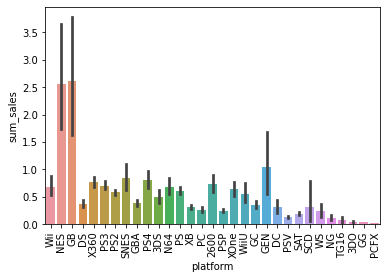

In [17]:
sns.barplot(x='platform', y='sum_sales', data=data)
plt.xticks(rotation = 90);

**шаг 3**

In [18]:
data.groupby('year_of_release')['sum_sales'].count()

year_of_release
1        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: sum_sales, dtype: int64

In [19]:
data.groupby('year_of_release')['sum_sales'].sum()

year_of_release
1        98.92
1980     11.38
1981     35.68
1982     28.88
1983     16.80
1984     50.35
1985     53.95
1986     37.08
1987     21.70
1988     47.21
1989     73.45
1990     49.37
1991     32.23
1992     76.16
1993     45.99
1994     79.23
1995     88.12
1996    199.15
1997    201.07
1998    256.31
1999    251.11
2000    201.66
2001    331.46
2002    394.97
2003    357.54
2004    418.68
2005    457.82
2006    517.71
2007    604.75
2008    671.50
2009    658.82
2010    590.13
2011    507.58
2012    355.84
2013    361.24
2014    331.53
2015    267.98
2016    129.94
Name: sum_sales, dtype: float64

In [20]:
platform_rating = data.groupby('platform')['sum_sales'].sum()
platform_rating.sort_values(ascending=False).head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sum_sales, dtype: float64

**Актуальные данные (за последние 4 ПОЛНЫХ года)**

In [21]:
data_actual = data[(data['year_of_release'] >= 2012) & (data['critic_score'] >= 0)].reset_index(drop=True)
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
3,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [22]:
data_actual = data_actual.dropna()

In [23]:
data_actual.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sum_sales          0
dtype: int64

In [24]:
data_actual_plat = data_actual.groupby(['year_of_release', 'platform']).agg(plt_sum=('sum_sales', 'sum'))
data_actual_plat.columns=['plt_sum']
data_actual_plat_good = data_actual_plat[data_actual_plat['plt_sum'] > 15]
data_actual_plat_good

plt_sum
year_of_release platform         
2012            3DS         39.39
                PC          22.01
                PS3         94.30
                X360        95.68
2013            3DS         15.89
                PS3        102.71
                PS4         25.07
                WiiU        17.40
                X360        75.17
2014            PS4         80.95
                WiiU        15.22
                XOne        47.01
2015            PS4         80.90
                WiiU        15.35
                XOne        44.60
2016            PS4         57.40
                XOne        23.84

**Я выбрал последние 4 года как актуальные данные. В лидерах платформ - PS4, XOne, WIIU, PS3, X360**

**Можно сделать вывод, что лидерами рынка скорее являются компании создающие платформы, а актуальность самих платорм зависит от времени проведенном на рынке. Например после выхода PS4 продажи на ней повысились,в то время как интерес к PS3 начал угасать, но и та и та платформа является продуктом фирмы Sony.**
* DS3, WIIU - Nintendo
* Xone - Microsoft
* PS4 - Sony

In [25]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1311
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1309 non-null   object 
 1   platform         1309 non-null   object 
 2   year_of_release  1309 non-null   int64  
 3   genre            1309 non-null   object 
 4   na_sales         1309 non-null   float64
 5   eu_sales         1309 non-null   float64
 6   jp_sales         1309 non-null   float64
 7   other_sales      1309 non-null   float64
 8   critic_score     1309 non-null   int64  
 9   user_score       1309 non-null   float64
 10  rating           1309 non-null   object 
 11  sum_sales        1309 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 165.2+ KB


**Из актуальных данных оставляем только актуальные платформы (нынешние и предыдущие платформы самых популярных компаний)**

In [26]:
data_top = data_actual[
    (data_actual['platform'] == '3DS') |
    (data_actual['platform'] == 'PS4') |
    (data_actual['platform'] == 'XOne') |
    (data_actual['platform'] == 'PS3') |
    (data_actual['platform'] == 'X360') |
    (data_actual['platform'] == 'WiiU')
]
data_top = data_top.reset_index(drop=True)

<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

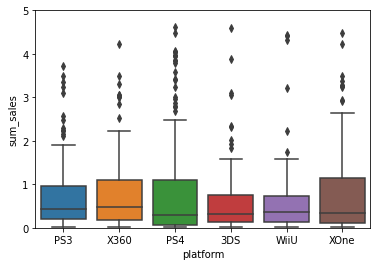

In [27]:
plt.ylim(0, 5)
sns.boxplot(x=data_top['platform'], y=data_top['sum_sales'])

по сумме продаж x360, xone, ps3 и ps4 имеют идентичные показатели по суммам продаж, показатели 3ds B wiiu значительно меньше

In [28]:
data_ps4 = data_top.query('platform == "PS4"')
data_ps4['critic_score'].corr(data_ps4['sum_sales'])

0.40600211593500984

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

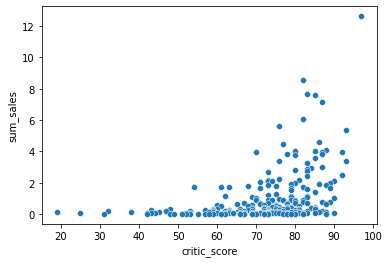

In [29]:
sns.scatterplot(x=data_ps4['critic_score'], y=data_ps4['sum_sales'])

In [30]:
data_XOne = data_top.query('platform == "XOne"')
data_XOne['critic_score'].corr(data_XOne['sum_sales'])

0.4153923422848885

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

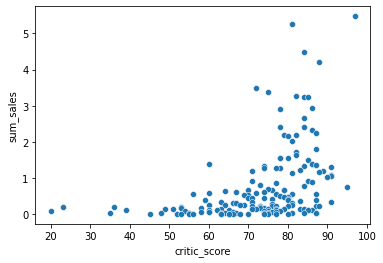

In [31]:
sns.scatterplot(x=data_XOne['critic_score'], y=data_XOne['sum_sales'])

In [32]:
data_ps3 = data_top.query('platform == "PS3"')
data_ps3['critic_score'].corr(data_ps3['sum_sales'])

0.3314972592629587

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

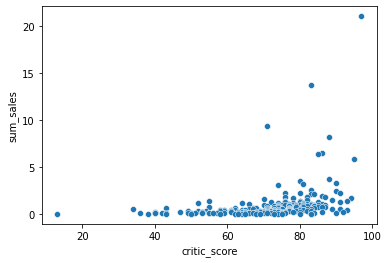

In [33]:
sns.scatterplot(x=data_ps3['critic_score'], y=data_ps3['sum_sales'])

In [34]:
data_X360 = data_top.query('platform == "X360"')
data_X360['critic_score'].corr(data_X360['sum_sales'])

0.3605734888507336

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

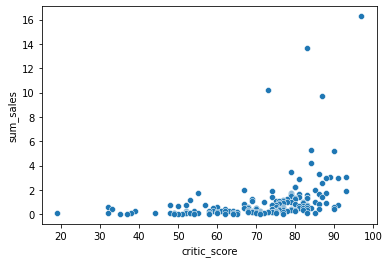

In [35]:
sns.scatterplot(x=data_X360['critic_score'], y=data_X360['sum_sales'])

In [36]:
data_3DS = data_top.query('platform == "3DS"')
data_3DS['critic_score'].corr(data_3DS['sum_sales'])

0.3208028695360785

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

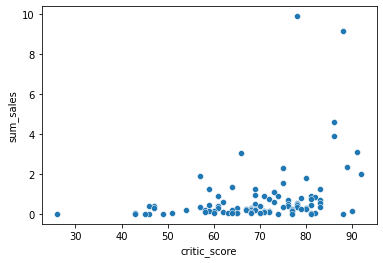

In [37]:
sns.scatterplot(x=data_3DS['critic_score'], y=data_3DS['sum_sales'])

In [38]:
data_WiiU = data_top.query('platform == "WiiU"')
data_WiiU['critic_score'].corr(data_WiiU['sum_sales'])

0.34837976012017485

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

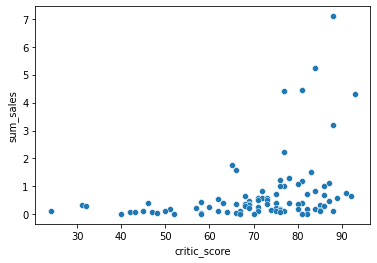

In [39]:
sns.scatterplot(x=data_WiiU['critic_score'], y=data_WiiU['sum_sales'])

**По граффикам видно, что корреляция хоть и слабая, но есть. Но вообще, по моему личному мнению, оценка критиков никогда сильно не влияла на продажи. Львиную долю покупок совершают рядовые пользователи, а популярность среди них распростроняется посредством сарафанного радио. Грубо говоря, если пользователь захотел поиграть в игру, он посмотрит трейлер игры, обзор на нее от блогера или почитает отзывы инфлюенсеров. Оценки критиков конечно покажут насколько хорошо продумана и выполнена игра и помогут предположить количество продаж, но сам факт того, что игра понравится или не понравится, зависит от ее содержания, и продвижения, а не от оценок критиков. Предположим что 100 пользователей сыграли в игру и оценили её на 9-10, даже не зная того, что критики оценили ее также, а играть они в нее начали из за пиара или популярности на стриминговых платформах.**

In [40]:
genre_popular = data_top.groupby('genre')['sum_sales'].mean()
genre_popular.sort_values(ascending=False).head()

genre
Shooter       1.718106
Sports        1.094274
Platform      0.926471
Action        0.885913
Simulation    0.773636
Name: sum_sales, dtype: float64

In [41]:
genre_popular_all = data.groupby('genre')['sum_sales'].mean()
genre_popular_all.sort_values(ascending=False).head()

genre
Platform        0.932173
Shooter         0.795503
Role-Playing    0.623872
Racing          0.583403
Sports          0.566980
Name: sum_sales, dtype: float64

**ТОП-5 жанров по среднему количеству продаж**

**genre popular - 2012 - 2016**

**genre popular all - за все время**

**Мы можем наблюдать, что пятерка жанров за актуальный период следущая: шутеры, спорт, платформеры, экшн, симуляторы. уитывая что выборка с 1980 по 2016, не удивительно, что за все время лидируют платформеры, так как в ранние годы игровой индустрии выпускались только платформеры, а некоторые из них стали классикой и до сих пор на слуху. В актуальный же период с большим отрывом лидируют шутеры.**

**ШАГ 4: создать портрет потребителя из разных стран**

In [42]:
data_na_actual = data_top.groupby('platform')['na_sales'].mean().sort_values(ascending=False).head()
data_na_actual

platform
X360    0.625673
XOne    0.453036
PS3     0.360327
WiiU    0.342000
PS4     0.336653
Name: na_sales, dtype: float64

In [43]:
data_eu_actual = data_top.groupby('platform')['eu_sales'].mean().sort_values(ascending=False).head()
data_eu_actual

platform
PS4     0.447968
PS3     0.366822
X360    0.334211
XOne    0.251786
WiiU    0.227778
Name: eu_sales, dtype: float64

In [44]:
data_jp_actual = data_top.groupby('platform')['jp_sales'].mean().sort_values(ascending=False).head()
data_jp_actual

platform
3DS     0.255769
WiiU    0.113000
PS3     0.095234
PS4     0.037570
X360    0.008070
Name: jp_sales, dtype: float64

In [45]:
data_other_actual = data_top.groupby('platform')['other_sales'].mean().sort_values(ascending=False).head()
data_other_actual

platform
PS3     0.151308
PS4     0.151195
X360    0.090234
XOne    0.069464
WiiU    0.053556
Name: other_sales, dtype: float64

**Северна Америка: X360, XOne, PS3**

**Европа: PS4, PS3, X360**

**Япония: 3DS, WIIU, PS3**

**Другие: PS4, PS3, X360**

In [46]:
data_na_genre = data_top.groupby('genre')['na_sales'].mean().sort_values(ascending=False).head()
data_na_genre

genre
Shooter     0.835758
Sports      0.524032
Platform    0.389412
Action      0.380435
Misc        0.278333
Name: na_sales, dtype: float64

In [47]:
data_eu_genre = data_top.groupby('genre')['eu_sales'].mean().sort_values(ascending=False).head()
data_eu_genre

genre
Shooter     0.618030
Sports      0.409597
Action      0.340435
Racing      0.325667
Platform    0.303529
Name: eu_sales, dtype: float64

In [48]:
data_jp_genre = data_top.groupby('genre')['jp_sales'].mean().sort_values(ascending=False).head()
data_jp_genre

genre
Simulation      0.334091
Platform        0.155490
Role-Playing    0.130865
Puzzle          0.090000
Misc            0.067083
Name: jp_sales, dtype: float64

In [49]:
data_other_genre = data_top.groupby('genre')['other_sales'].mean().sort_values(ascending=False).head()
data_other_genre

genre
Shooter     0.207424
Sports      0.140968
Action      0.111594
Platform    0.078039
Racing      0.075333
Name: other_sales, dtype: float64

**В Северной Америке, Европе и Других странах почти одинаковы рейтинг по жанрам: Шутеры, платформеры, спорт, гонки. В японии же лидируют: Ролевые игры, платформеры и файтинги.**

In [50]:
rating_na = data_top.groupby('rating')['na_sales'].mean().sort_values(ascending=False).head()
rating_na

rating
M          0.616921
E          0.430135
E10+       0.277609
T          0.220700
unknown    0.054000
Name: na_sales, dtype: float64

In [51]:
rating_eu = data_top.groupby('rating')['eu_sales'].mean().sort_values(ascending=False).head()
rating_eu

rating
M          0.500305
E          0.403857
E10+       0.192174
T          0.165761
unknown    0.060500
Name: eu_sales, dtype: float64

In [52]:
rating_jp = data_top.groupby('rating')['jp_sales'].mean().sort_values(ascending=False).head()
rating_jp

rating
E          0.114619
T          0.069877
M          0.055122
E10+       0.040217
unknown    0.011500
Name: jp_sales, dtype: float64

In [53]:
rating_other = data_top.groupby('rating')['other_sales'].mean().sort_values(ascending=False).head()
rating_other

rating
M          0.168659
E          0.114753
E10+       0.060489
T          0.058807
unknown    0.017000
Name: other_sales, dtype: float64

**Как и в случае с жанрами, в Америке, Европе и других регионах больше всего проданных копий с рейтингом ESRB: M И E.**

**В японии же преобладает рейтинг: E И T. На первом месте стоит 'unknown' (замена пропусков).**        

**Смотря на рейтинги в разных странах, можно заметить корреляцию с предыдущей частью исследования. Мы можем заметить, что в Японии мало проданых игр в жанре шутер. Проверяем какой рейтинг как правило присваивают шутерам (ниже) и видим, что спрос на игры с рейтингом M в Японии небольшой. Возможно это связано с тем, насколько я знаю, что страны Азии очень серьезно относятся к цензуре насилия, крови и тд.**

**Факт из гугла (рейтинг преступности): США стоят на 56 месте по индексу преступности, в то время как Япония стоит аж на 130 месте, так что можно предположить, что игры с насилием у них не приживаются по признаку культуры.** 

In [54]:
data_shoot = data_actual[data_actual['genre'] == 'Shooter']
print(data_shoot.groupby('rating')['name'].count())

rating
E10+        12
M          142
T           17
unknown      2
Name: name, dtype: int64


**ВЫВОД: Мы составили портреты пользователей из разных стран, выяснили, что пользователей из европы, америки, и других стран предпочитают одинаковые платформы и жанры, глобальные отличия в предпочтениях имеет только Япония**

---

**H0: Средние пользовательские рейтинги платформ Xbox One равен среднему пользовательскому рейтингу PC .**

**Н1: Средние пользовательские рейтинги платформ Xbox One НЕ равен среднему пользовательскому рейтингу РС.**

In [66]:
results = st.ttest_ind(
    data_actual[data_actual['platform'] == 'XOne']['user_score'],
    data_actual[data_actual['platform'] == 'PC']['user_score'], equal_var = False
)

alpha = .05

print(results.pvalue)

if alpha > results.pvalue:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.770137008370568
Не удалось отвергнуть нулевую гипотезу


**Н0: Средние пользовательские рейтинги жанра Action равны среднему пользовательскому рейтингу жанра Sports.**

**Н1: Средние пользовательские рейтинги жанра Action НЕ равны среднему пользовательскому рейтингу жанра Sports.**

In [69]:
results = st.ttest_ind(
    data_actual[data_actual['genre'] == 'Action']['user_score'],
    data_actual[data_actual['genre'] == 'Sports']['user_score'], equal_var = False
)

alpha = .05

print(results.pvalue)

if alpha > results.pvalue:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не удалось отвергнуть нулевую гипотезу')

3.4959224961369172e-12
Отвергаем нулевую гипотезу


**Нулевые гипотезы всегда про равенство, альтернативная гипотеза - противоположна нулевой**

**Вывод:**
* Япония отличается от других Стран по предпочтениям в жанрах и платформах
* Раньше самым популярным жанром были платформеры, но с развитием игровой индустрии, стали популярны шутеры
* Самыми популярными платформами в актуальное время являются XOne/X360, PS4/PS3, 3DS. Говоря более обобщенно: рынок сейчас за продукцией компаний SONY, MICROSOFT, NINTENDO, а актуальность самой продукции зависит от времени пребывания на рынке. Каждый фанат определенной платформы старается актуализировать свое игровое оборудование.

